# Lending Club Risk Adjusted Interest Rate Prediction

Created by Cindy Liu on 10/6/2018

Predict interest rate and default for Lending Club loans to manage risk.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Load and Browse the data

In [3]:
location='/../Downloads/loan.csv'
my_data=pd.read_csv(location)
df=my_data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
df.shape

(887379, 74)

In [6]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


#### Missing Value Check

In [8]:
na_cols = df.shape[0]-df.count()
na_cols[na_cols>0]

emp_title                       51462
emp_length                      44825
annual_inc                          4
desc                           761351
title                             152
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
open_acc                           29
pub_rec                            29
revol_util                        502
total_acc                          29
last_pymnt_d                    17659
next_pymnt_d                   252971
last_credit_pull_d                 53
collections_12_mths_ex_med        145
mths_since_last_major_derog    665676
annual_inc_joint               886868
dti_joint                      886870
verification_status_joint      886868
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    866007
open_il_6m  

## Explore Data

### 1) Numerical variables

### Annual Income

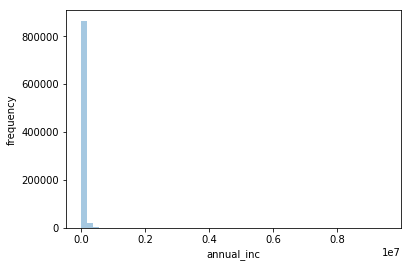

In [31]:
sns.distplot(df['annual_inc'], kde=False).set_ylabel('frequency')
plt.show()

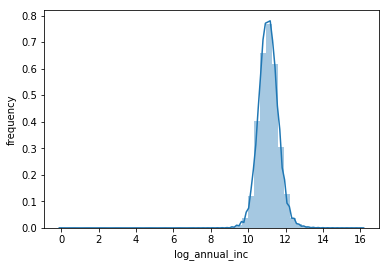

In [113]:
from math import log
df['log_annual_inc'] = df['annual_inc'].apply(lambda x: log(x+1))
sns.distplot(df['log_annual_inc']).set(ylabel='frequency')
plt.show()

### Loan Amount

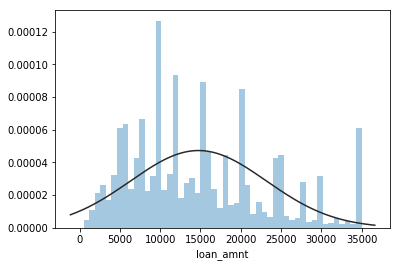

In [33]:
sns.distplot(df['loan_amnt'], kde=False, fit=stats.norm)
plt.show()

### Interest Rate

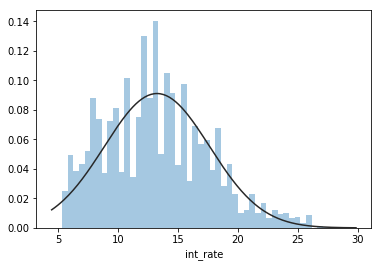

In [34]:
sns.distplot(df['int_rate'], kde=False, fit=stats.norm)
plt.show()

### Correlation plot between features

Text(0.5,1,u'Correlation Plot')

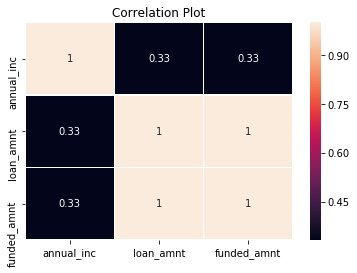

In [50]:
num_vars = df[['annual_inc','loan_amnt','funded_amnt']]
num_vars_corr = num_vars.corr()
sns.heatmap(num_vars_corr,linecolor='white',linewidth=0.5,annot=True).set_title('Correlation Plot')

### Debt-to-Income Ratio

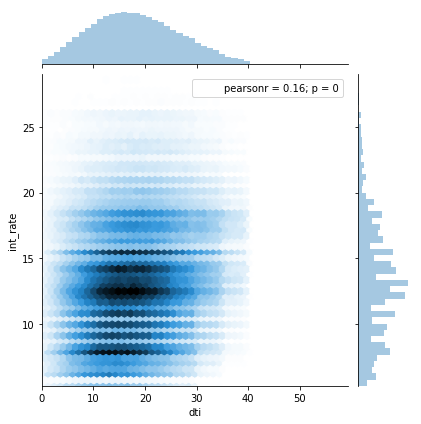

In [110]:
#print 'dti<1:', df['dti'][df['dti']<1].count()
#print 'dti>1:', df['dti'][df['dti']>1].count()
#df['dti_2']=df['dti'].apply(lambda x: '<1' if x<1 else '>1')
#sns.boxplot(x='dti_2', y='int_rate', data=df, palette='Set3').set_title('Interest Rate vs. Debt-to-Income Ratio')
#sns.boxplot(df['dti'][df['dti']<60])

df_dti60 = df[['dti','int_rate']][df['dti']<60]
sns.jointplot(x='dti',y='int_rate',data=df_dti60,kind='hex')
plt.show()

### Loan amount

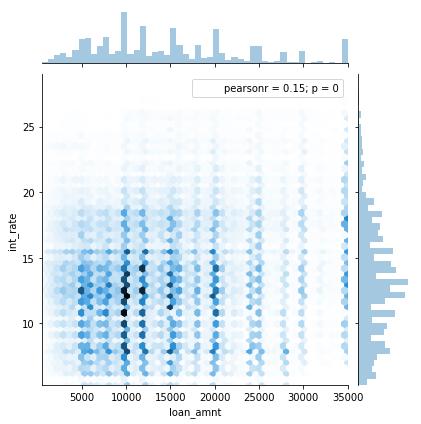

In [112]:
sns.jointplot(x='loan_amnt',y='int_rate',data=df,kind='hex')
plt.show()

### log annual income

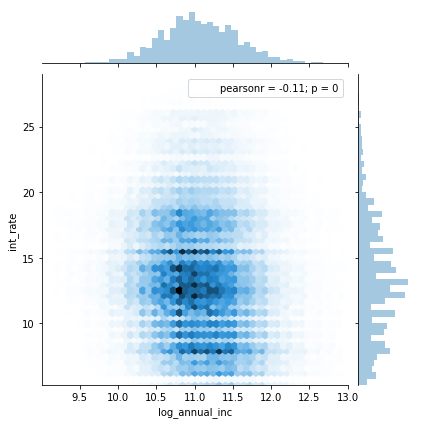

In [120]:
df_log_annual_inc_slice = df[['log_annual_inc','int_rate']][df['log_annual_inc']>9]
df_log_annual_inc_slice = df_log_annual_inc_slice[df_log_annual_inc_slice['log_annual_inc']<13]
sns.jointplot(x='log_annual_inc',y='int_rate',data=df_log_annual_inc_slice,kind='hex')
plt.show()

### 2) Categorical Variables 

### Loan Status

In [35]:
df.groupby('loan_status').count()['id']

loan_status
Charged Off                                             45248
Current                                                601779
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             207723
In Grace Period                                          6253
Issued                                                   8460
Late (16-30 days)                                        2357
Late (31-120 days)                                      11591
Name: id, dtype: int64

In [39]:
#Some factor levels are essentially the same, so I combined them
df['loan_status'] = df['loan_status'].str.replace('Does not meet the credit policy. Status.', '')
df.groupby('loan_status').count()['id']

loan_status
Charged Off            46009
Current               601779
Default                 1219
Fully Paid            209711
In Grace Period         6253
Issued                  8460
Late (16-30 days)       2357
Late (31-120 days)     11591
Name: id, dtype: int64

In [40]:
# further combined to two factor levels -> imbalalanced data
df['loan_status_2'] = df['loan_status'].apply(lambda x: 0 if x in ['Current','Fully Paid','In Grace Period'] else 1)
df.groupby('loan_status_2').count()['id']

loan_status_2
0    817743
1     69636
Name: id, dtype: int64

### Loan Grade

In [41]:
df.groupby('grade').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,148202.0,14038.860306,7502.131394,500.0,8000.0,12000.0,20000.0,35000.0
B,254535.0,13642.965211,7761.052338,500.0,8000.0,12000.0,18000.0,35000.0
C,245860.0,14466.306028,8538.698565,500.0,8000.0,12000.0,20000.0,35000.0
D,139542.0,15459.506278,9012.631150,500.0,8500.0,14000.0,21000.0,35000.0
E,70705.0,17998.146171,9196.163217,600.0,11000.0,16850.0,25000.0,35000.0
F,23046.0,19139.160809,9213.624250,1000.0,12000.0,18625.0,25875.0,35000.0
G,5489.0,20538.563491,8789.569903,600.0,13475.0,20000.0,27550.0,35000.0


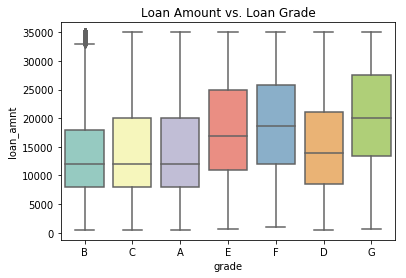

In [42]:
sns.boxplot(x='grade', y='loan_amnt', data=df, palette='Set3').set_title('Loan Amount vs. Loan Grade')
plt.show()

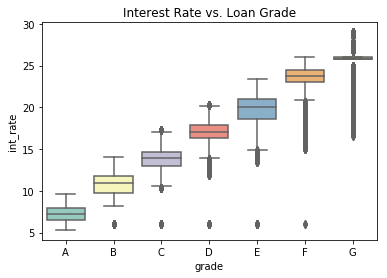

In [43]:
sns.boxplot(x='grade', y='int_rate', data=df, palette='Set3',order=['A','B','C','D','E','F','G']).set_title('Interest Rate vs. Loan Grade')
plt.show()

### Loan Status

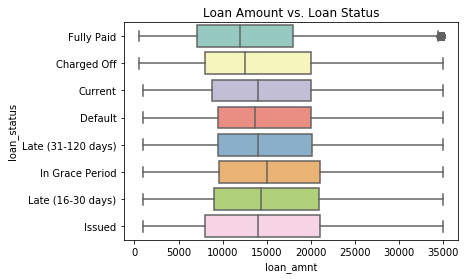

In [121]:
sns.boxplot(x='loan_amnt', y='loan_status', data=df, palette='Set3').set_title('Loan Amount vs. Loan Status')
plt.show()

Text(0.5,1,u'Interest Rate vs. Home Ownership')

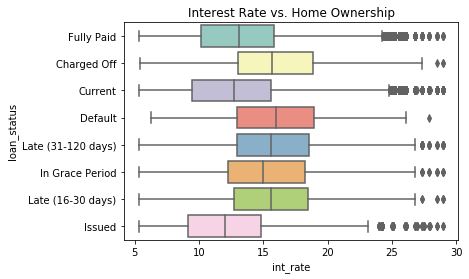

In [45]:
sns.boxplot(x='int_rate', y='loan_status', data=df, palette='Set3').set_title('Interest Rate vs. Home Ownership')

### Home Ownership

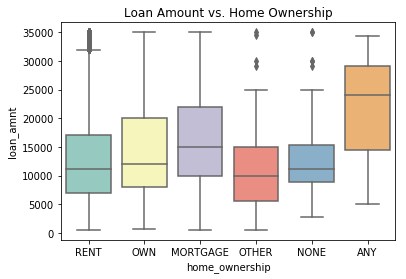

In [47]:
sns.boxplot(x='home_ownership', y='loan_amnt', data=df, palette='Set3').set_title('Loan Amount vs. Home Ownership')
plt.show()

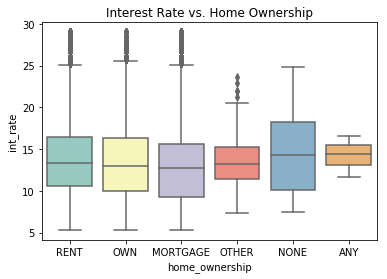

In [49]:
sns.boxplot(x='home_ownership', y='int_rate', data=df, palette='Set3').set_title('Interest Rate vs. Home Ownership')
plt.show()

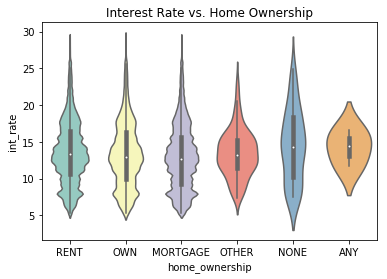

In [51]:
sns.violinplot(x='home_ownership', y='int_rate', data=df, palette='Set3').set_title('Interest Rate vs. Home Ownership')
plt.show()

### Loan Purpose

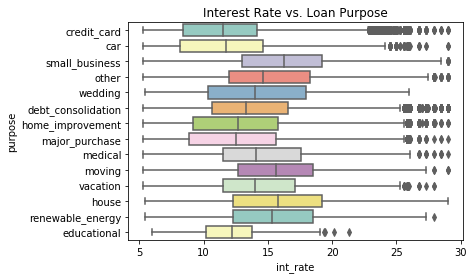

In [3]:
sns.boxplot(x='int_rate', y='purpose', data=df, palette='Set3').set_title('Interest Rate vs. Loan Purpose')
plt.show()

### Payment Plan

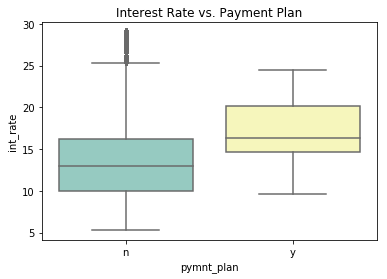

In [57]:
sns.boxplot(x='pymnt_plan', y='int_rate', data=df, palette='Set3').set_title('Interest Rate vs. Payment Plan')
plt.show()

### Term

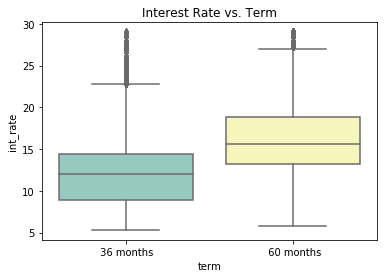

In [6]:
sns.boxplot(x='term', y='int_rate', data=df, palette='Set3').set_title('Interest Rate vs. Term')
plt.show()

In [10]:
short_term = df[df['term']==' 36 months']['int_rate']
short_term.describe()

count    621125.000000
mean         12.018678
std           3.853066
min           5.320000
25%           8.900000
50%          11.990000
75%          14.470000
max          28.990000
Name: int_rate, dtype: float64

In [11]:
long_term = df[df['term']==' 60 months']['int_rate']
long_term.describe()

count    266254.000000
mean         16.111596
std           4.199265
min           5.790000
25%          13.180000
50%          15.610000
75%          18.790000
max          28.990000
Name: int_rate, dtype: float64

In [31]:
#F = short_term.var() / long_term.var()
#stats.f.cdf(F,len(short_term)-1, len(long_term)-1)
print 'one-way ANOVA result:', stats.f_oneway(short_term,long_term)
print 'Welch t-test result:',stats.ttest_ind(short_term, long_term, equal_var=False)

one-way ANOVA result: F_onewayResult(statistic=199074.28270463392, pvalue=0.0)
Welch t-test result: Ttest_indResult(statistic=-431.11699062985156, pvalue=0.0)


In [41]:
obs = pd.crosstab(df['term'],df['grade'], margins = True)
print 'chi2 test p-value:', stats.chi2_contingency(obs)[1]

chi2 test p-value: 0.0


### Verification Status

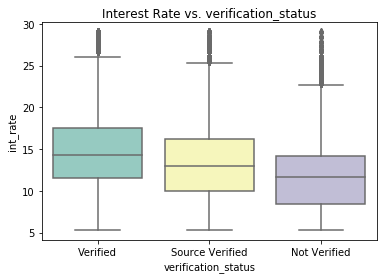

In [5]:
sns.boxplot(x='verification_status', y='int_rate', data=df, palette='Set3').set_title('Interest Rate vs. verification_status')
plt.show()